In [329]:
#---------Authors---------
#ta.losada
#---------------------

# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
# Librerías de aprendizaje automático.
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

from scipy import stats
##Import pipeline
from joblib import dump, load

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [330]:
# Se cargan los datos. 

test=pd.read_csv('Test_data.csv')
train=pd.read_csv('Train_data.csv')
print(train.shape)
print(test.shape)
train

(25192, 42)
(22544, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [331]:
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


# Revisar que columnas estan en test pero no en train

Por si toca hacer algun drop de columnas para que queden los datasets consistentes

In [332]:
columnasTest = test.columns.tolist()
columnasTrain = train.columns.tolist()

newColumns = []

for i in columnasTrain:
    if i not in columnasTest:
        # Columnas que estan en test pero no en train
        newColumns.append(i)

print(newColumns)

['class']


In [333]:
test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [334]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [335]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [336]:
train.shape

(25192, 42)

In [337]:
test.shape

(22544, 41)

# Exploracion Datos

In [338]:
# pandas_profiling.ProfileReport(train)

In [339]:
for i in train['duration']:
    if i > 2143:
        print(i)

5607
9052
25950
9015
15159
9235
36613
5043
31401
7805
5784
10455
10326
41285
13488
3047
5065
5753
17399
21263
4931
9908
35682
15435
2414
8486
37815
9114
41802
4468
40703
8625
8556
37874
5410
41111
2969
5080
9431
37749
39667
25641
38776
37688
6214
8257
2670
3660
7701
22861
27018
12278
31461
2910
10656
21123
2511
2532
7631
29053
6707
12705
3995
37912
2629
13678
11481
6163
18438
9375
13816
36131
9219
21927
5290
5036
11371
12774
13663
14380
7580
8649
4629
13564
2448
40053
10264
2355
5698
20252
11457
36280
3447
12096
12039
3030
41254
10629
8952
13428
30438
2736
2775
14608
21701
2980
13501
5954
7034
5066
12124
36151
7070
9033
5831
4474
37072
10332
2650
39627
6515
39602
12123
16800
2603
39399
7232
7755
16885
4229
12753
37370
38977
16513
10946
2349
2586
11338
4852
21846
4280
5044
37728
17964
2217
3779
12571
3980
36700
8397
6192
13958
17903
4794
39438
6285
6565
9505
2207
4080
5041
4550
13368
18888
7787
3690
4535
12833
40171
4382
17025
12892
10774
3735
9305
4021
3026
4309
3409
4641
25990
2584
84

# Limpieza de datos

### SUPUESTOS

Los datos deben ser de las categorias o maximo el valor que se encuentra en Kaggle

https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection/data

Dropna

In [340]:
train.dropna(inplace=True)
train = train.reset_index(drop=True)


* Duration

In [341]:
train.drop(train.loc[train["duration"] > 2143].index, inplace=True)
train = train.reset_index(drop=True)

* Protocol Type

Esta de acuerdo al dataset

* Service

Deberia tener unicamente las categorias de telnet, pop_3, smtp, http, private

In [342]:
train["service"].describe()

count     24665
unique       66
top        http
freq       8003
Name: service, dtype: object

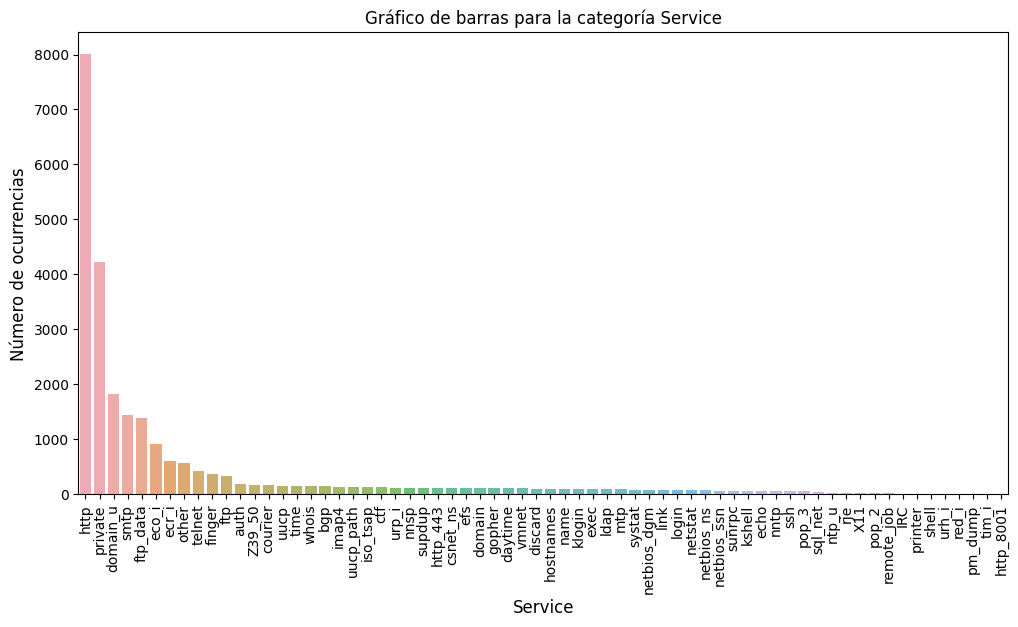

In [343]:

service_counts = train['service'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=service_counts.index, y=service_counts.values, alpha=0.8)
plt.title('Gráfico de barras para la categoría Service')
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('Service', fontsize=12)
plt.xticks(rotation=90)
plt.show()



In [344]:
serviceCategories = ['http', 'private', 'smtp', 'ftp_data', 'domain_u']

for i in range(0,len(train['service'])):
    if train['service'][i] not in serviceCategories:
        train['service'][i] = 'Other'
        

C:\Users\user\AppData\Local\Temp\ipykernel_16340\264277359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['service'][i] = 'Other'


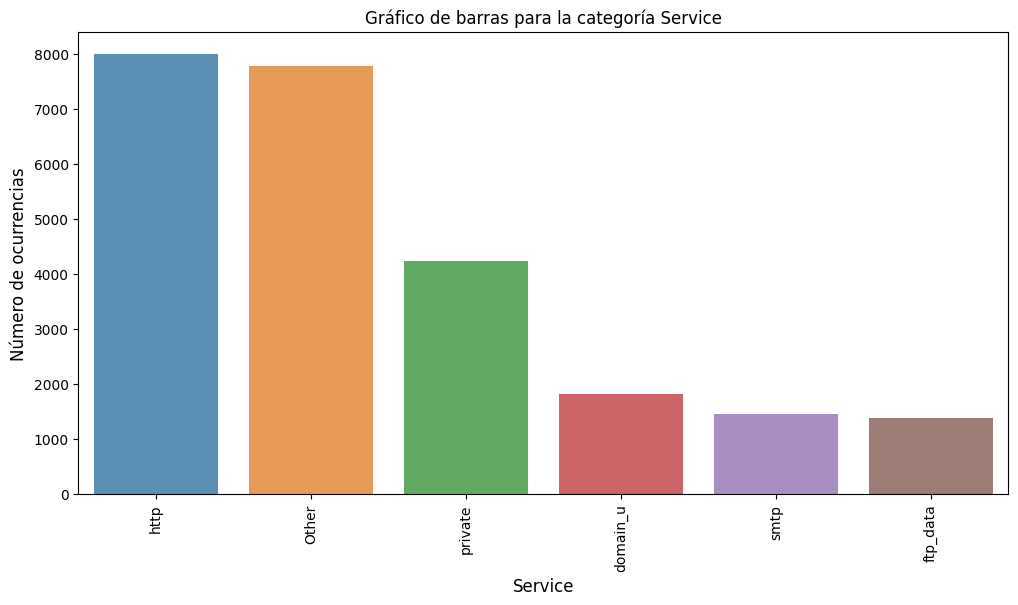

In [345]:

service_counts = train['service'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=service_counts.index, y=service_counts.values, alpha=0.8)
plt.title('Gráfico de barras para la categoría Service')
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('Service', fontsize=12)
plt.xticks(rotation=90)
plt.show()



* Flag

En kaggel solo estan las categorias de SF, REJ, S0, RSTO, RSTR

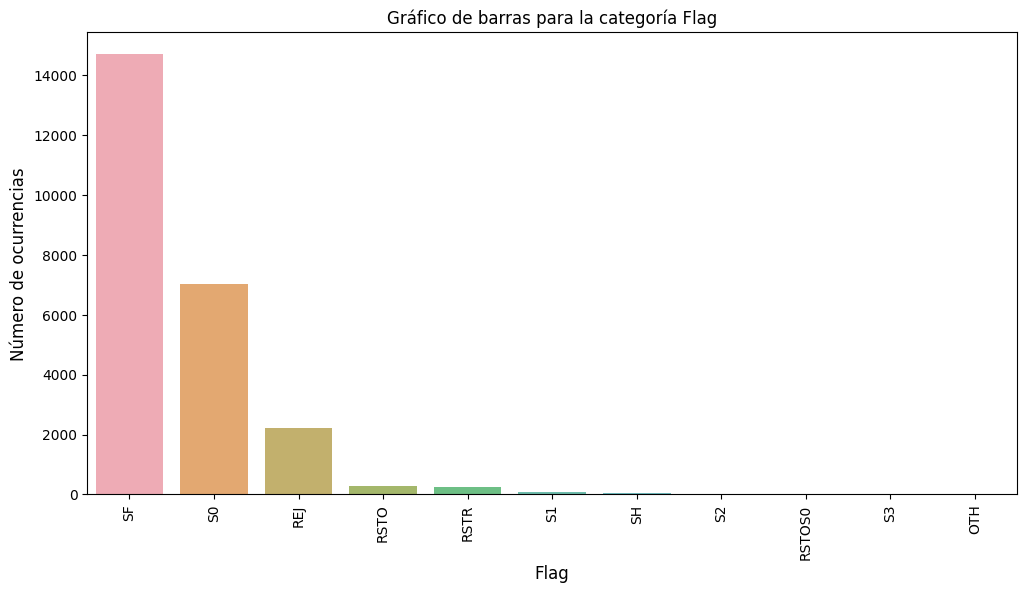

In [346]:

service_counts = train['flag'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=service_counts.index, y=service_counts.values, alpha=0.8)
plt.title('Gráfico de barras para la categoría Flag')
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('Flag', fontsize=12)
plt.xticks(rotation=90)
plt.show()



In [347]:
flagCategories = ['S1', 'SH', 'S2', 'RSTOS0', 'S3','OTH']

for i in flagCategories:
    
    print(f"Cantidad de  datos {i} son {(train['flag'] == i).sum()}")

Cantidad de  datos S1 son 88
Cantidad de  datos SH son 43
Cantidad de  datos S2 son 21
Cantidad de  datos RSTOS0 son 20
Cantidad de  datos S3 son 14
Cantidad de  datos OTH son 5


Podriamos eliminar esos datos o manejarlos en una categoria diferente como other, dependiendo de como la profe diga

In [348]:
flagCategories = ['SF', 'S0', 'REJ', 'RSTR', 'RST0']

for i in range(0,len(train['service'])):
    if train['service'][i] not in serviceCategories:
        train['service'][i] = 'Other'
        


    
        

C:\Users\user\AppData\Local\Temp\ipykernel_16340\479717210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['service'][i] = 'Other'


* src_bytes

se toma el valor mayor de bytes que es 19085454.50

In [349]:
train.drop(train.loc[train["src_bytes"] > 19085454.50].index, inplace=True)
train = train.reset_index(drop=True)

* dst_bytes

Se toma el valor mayor de 257569.25

In [350]:
train.drop(train.loc[train["dst_bytes"] > 257569.25].index, inplace=True)
train = train.reset_index(drop=True)

* land 

Se toma el valor mayor de 0.05

In [351]:
train['land'].describe()

count    24645.000000
mean         0.000081
std          0.009008
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: land, dtype: float64

In [352]:
train.drop(train.loc[train["land"] > 0.05].index, inplace=True)
train = train.reset_index(drop=True)

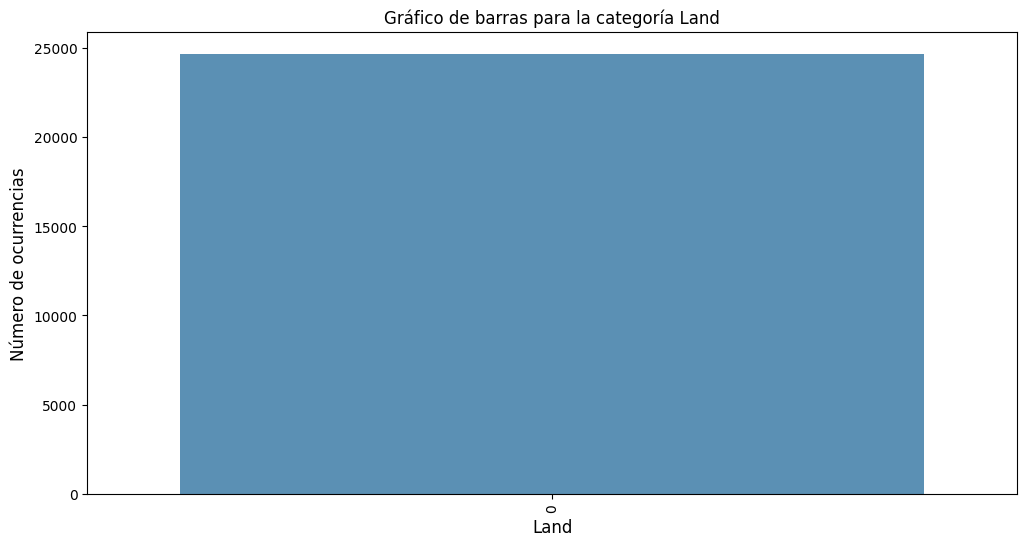

In [353]:

service_counts = train['land'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=service_counts.index, y=service_counts.values, alpha=0.8)
plt.title('Gráfico de barras para la categoría Land')
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('Land', fontsize=12)
plt.xticks(rotation=90)
plt.show()

